
# Recommendation System for Amazon Products
In this project, I have developed two recommendation systems for Amazon products based on customer reviews and product descriptions, using cosine similarity and word embeddings.

### Data Set Description and Data Preparation
The data set used in this project consists of 10,000 fashion products sold in the UK through Amazon's website. The data was obtained from https://data.world/promptcloud/fashion-products-on-amazon-com/workspace/file?filename=amazon_co-ecommerce_sample.csv.

 The columns are:
- uniq_id
- product_name
- manufacturer
- price
- number available in stock
- number of reviews
- number of answered questions
- average review rating
- amazon_category_and_sub_category
- customers_who_bought_this_item_also_bought 	
- description 	
- product_information 	
- product_description 	
- items_customers_buy_after_viewing_this_item 	
- customer_questions_and_answers 	
- customer_reviews 	
- sellers

The ASIN number for each product was extracted from the product_information column since the products did not have ASIN numbers in the original dataset.

The text used to compare products was obtained from customer_reviews, product_description, and product_information columns. 

The ranking of the products was obtained from the product_information column, and the rating of the products was obtained from the average_review_rating column. Both the ranking and rating were used to recommend products with higher ranking or rating. 

Additionally, the related products (items in customers_who_bought_this_item_also_bought and items_customers_buy_after_viewing_this_item) were added to the list of most similar products obtained. 

Price column is cleaned and converted into US dollars and used to recommend products that are closest in range to the product at hand.

### Recommender using Cosine Similarity
The text for each product was processed to obtain tokenized words by fixing contractions, removing stop words and punctuations. TF-IDF vectors were created, and cosine similarity of products was obtained. The top 10 most similar products were extracted for each product, and the related products were added to this list. Three filters were applied to this list of final recommendations:

- The top 5 products with the highest ranking in the best-selling list.
- The top 5 products with the highest ratings.
- Products that are in a similar price range as the product.

### Recommender using Word Embeddings
In this approach, word embeddings were created using word2vec. For each word entered by the user, the five most similar words were obtained, and the products whose text consisted of these six words were selected as the most similar ones. These products were then ordered by their ranking in the best-selling list, and the top five products were chosen. They are displayed by their ratings.

### The Challenges:
The challenges I encountered while working on this project were mostly related to data cleaning. I didn't have the ASIN numbers of the products, so at first I thought I had to look at other datasets to gather the ASIN numbers. Then I realized I could get them from the URL's of the products. Another problem was my computer couldn't allocate the necessary memory space for some functions such as computing cosine similarity, so, I had to move Google Colab half way through the project.  

### Conclusion
The two recommendation systems developed in this project use different approaches to recommend products based on customer reviews and product descriptions. The cosine similarity approach is more specific to a particular product, while the word embeddings approach is more general and can be used to search for products using keywords.

In [2]:
import pandas as pd
reviews = pd.read_csv('amazon_fashion.csv')
reviews.shape

(10000, 17)

In [3]:
reviews.head(3)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [5]:
#Drop missing values in the relevant columns
reviews_clean = reviews.dropna(subset = ['customer_reviews', 'average_review_rating','amazon_category_and_sub_category','price','product_information'])
print(reviews_clean.shape)
reviews_clean.head(3)

(7949, 17)


,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."


In [6]:
#Drop unnecessary columns
df = reviews_clean.drop(labels=["uniq_id", 'manufacturer', 'description', "number_available_in_stock","number_of_reviews", 
                                "number_of_answered_questions","customer_questions_and_answers","sellers"], axis=1)
print(df.shape)
df.head(3)

(7949, 9)


,product_name,price,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...



### Extracting ASIN numbers of the products:

"product_information" column has a summary which indicates unique product number "...Additional Information ASINB002QVLAMS...". The numbers after "ASIN" are product numbers which are also used in the URLs of the products.

In [7]:
print(df['product_information'].iloc[0])

Technical Details Item Weight640 g Product Dimensions29.6 x 20.8 x 1 cm Manufacturer recommended age:6 years and up Item model numberR8148 Main Language(s)English manual, English Number of Game Players1 Number of Puzzle Pieces1 Assembly RequiredNo Scale1:72 Engine Typeelectric Track Width/GaugeHO Batteries Required?No Batteries Included?No Material Type(s)Paper Material Care InstructionsNo Remote Control Included?No Radio Control Suitabilityindoor Colorwhite    Additional Information ASINB00HJ208KO Best Sellers Rank 52,854 in Toys & Games (See top 100) #69 in Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Trains Shipping Weight640 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available24 Dec. 2013    Feedback  Would you like to update product info or give feedback on images?


In [8]:
#Extract all products' unique ids:
df['asin'] = df['product_information'].apply(lambda x: x.split("ASIN")[1][:10])
print(df['asin'].iloc[350])
print(df['product_information'].iloc[350])

B00JDEC6CE
Technical Details Item Weight181 g Product Dimensions17.3 x 9.1 x 8.1 cm Manufacturer recommended age:3 years and up Manufacturer referenceg    Additional Information ASINB00JDEC6CE Best Sellers Rank 6,201 in Toys & Games (See top 100) #21 in Toys & Games > Arts & Crafts > Art Sand Shipping Weight181 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available14 Aug. 2013    Feedback  Would you like to update product info or give feedback on images?


In [9]:
df.head(3)

,product_name,price,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,asin
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4


The columns "customers_who_bought_this_item_also_bought" and "items_customers_buy_after_viewing_this_item" can provide useful information for identifying the most similar products. Therefore, I plan to incorporate these columns into my analysis. However, I have noticed that some values in these columns are missing and some contain URLs of the products instead of the ASIN numbers, as shown below:

In [10]:
print(df["items_customers_buy_after_viewing_this_item"].iloc[250])
print()
print(df["items_customers_buy_after_viewing_this_item"].iloc[450])
print()
print(df["items_customers_buy_after_viewing_this_item"].iloc[550])
print()
print(df["items_customers_buy_after_viewing_this_item"].iloc[750])

nan

http://www.amazon.co.uk/Airfix-A20440-1930-Litre-Bentley/dp/B0009E36NA | http://www.amazon.co.uk/Bentley-Speed-Six-diecast-Amercom/dp/8325218037 | http://www.amazon.co.uk/Bentley-Compressore

http://www.amazon.co.uk/Oxford-Diecast-Original-Goddess-76GG001/dp/B007G2WQ0W

http://www.amazon.co.uk/Batman-Arkham-Origins-Action-Figure/dp/B00LBCW284 | http://www.amazon.co.uk/DC-Direct-Batman-Arkham-Origins/dp/B00DEJ39OI | http://www.amazon.co.uk/Batman-Arkham-Knight-Nightwing-Action/dp/B00ZCZWBGO | http://www.amazon.co.uk/Pop-Heroes-Arkham-Knight/dp/B012OUONKG


Apparently, Amazon creates the URLs by adding the ASIN numbers at the end of their products' URL. I will capture those numbers from URLs and put them in the "related_products_asin" column of df. If there are no ASIN numbers at the end, or the value is 'nan', I will omit those. The following function performs this:

In [11]:
import numpy as np
def extract_asin(text):
    hold_asin = []
    if type(text)==str and '/dp/' in text:
        for i in text.split('/dp/')[1:]:
            hold_asin.append(i[:10])
    return hold_asin
df['related_products'] = df['items_customers_buy_after_viewing_this_item']+df['customers_who_bought_this_item_also_bought']   
df['related_products_asin'] = df['related_products'].apply(extract_asin)
df.head(3)

,product_name,price,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_reviews,asin,related_products,related_products_asin
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4..."


In [12]:
#Drop 'items_customers_buy_after_viewing_this_item','customers_who_bought_this_item_also_bought','related_products' columns:
df = df.drop(['items_customers_buy_after_viewing_this_item',
              'customers_who_bought_this_item_also_bought','related_products'], axis=1)
df.head(3)

,product_name,price,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customer_reviews,asin,related_products_asin
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4..."


### Product Ranking & Rating:

Once the recommendation system is established, I may want to improve it by filtering the products that are higher in the "best seller" ranking. "product_information" column has the best seller ranking information in it: "..Best Sellers Rank 52,854 in Toys & Games (See top 100)..". I need to extract these numbers and put them in the product_ranking column. I also need to add a category column to keep track of the category in which the ranking is done.    

In [13]:
df['rating'] = df['average_review_rating'].str[:3].astype(float)

In [14]:
print(df['product_information'].iloc[0])

Technical Details Item Weight640 g Product Dimensions29.6 x 20.8 x 1 cm Manufacturer recommended age:6 years and up Item model numberR8148 Main Language(s)English manual, English Number of Game Players1 Number of Puzzle Pieces1 Assembly RequiredNo Scale1:72 Engine Typeelectric Track Width/GaugeHO Batteries Required?No Batteries Included?No Material Type(s)Paper Material Care InstructionsNo Remote Control Included?No Radio Control Suitabilityindoor Colorwhite    Additional Information ASINB00HJ208KO Best Sellers Rank 52,854 in Toys & Games (See top 100) #69 in Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Trains Shipping Weight640 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available24 Dec. 2013    Feedback  Would you like to update product info or give feedback on images?


In [15]:
#Ranking of the products in the best seller list:
df['product_ranking'] = df['product_information'].str.split("Best Sellers Rank").str[-1].str.split("(").str[0]
df['category'] = df['product_ranking'].str.split(' in ').str[-1].str[-15:]
df['product_ranking'] = df['product_ranking'].str.split(' in ').str[0].str.split(',').str.join('')
df.head(3)


,product_name,price,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customer_reviews,asin,related_products_asin,rating,product_ranking,category
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Toys & Games
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Toys & Games
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Toys & Games


In [16]:
df['category'].value_counts()

Toys & Games       7875
back on images?      40
Kitchen & Home       14
 amznJQ.onReady       4
1 Main Language       2
25 Jan. 2016          1
p Material Type       1
ffice Products        1
ional Objective       1
Computers             1
Baby                  1
26 Jan. 2016          1
13 Jan. 2015          1
2 Main Language       1
Grocery               1
5 Grams Energy        1
den & Outdoors        1
8 Main Language       1
ar & Motorbike        1
Name: category, dtype: int64

Since most of the products belong to Toys & Games category and I want to compare products relatively similar, I will subset the dataset to include only the products that belong to Toys & Games section. 

In [17]:
df = df[df['category']=='Toys & Games ']
df.head(3)

,product_name,price,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customer_reviews,asin,related_products_asin,rating,product_ranking,category
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Toys & Games
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Toys & Games
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Toys & Games


In [18]:
# To make comparsions convert strings into integer numbers.
df['product_ranking'] = df['product_ranking'].astype(int)
df.drop('category', inplace=True, axis=1)
df.head(3)

<ipython-input-18-65741efcd85d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_ranking'] = df['product_ranking'].astype(int)
<ipython-input-18-65741efcd85d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('category', inplace=True, axis=1)


,product_name,price,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customer_reviews,asin,related_products_asin,rating,product_ranking
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147


### Cleaning customer reviews:

Reviews are separated by a '|' sign. Each review begins with something like "Just What I wanted // 5.0 // 30 Dec. 2013 // By David Potter on 30 Dec. 2013 //", then the review content follows. My plan is to split reviews by '|' to capture all reviews, then split each review by '//' and get the last item in the list to capture each individual review:

In [19]:
text = df['customer_reviews'].iloc[1500]
print(text)

Just perfect for my Grandsons who have so many toys already // 4.0 // 18 May 2015 // By
    
    S K Dhot
  
 on 18 May 2015 // Just perfect for my Grandsons who have so many toys already. They love playing with this when they are in fast car mode. I feel that buying bigger version of this would have been a waste of money. The thrill for them is served very well with this version. | 3/5 because you have to keep turning that key which ... // 3.0 // 14 May 2015 // By
    
    smtk
  
 on 14 May 2015 // 3/5 because you have to keep turning that key which for young children means daddy has to sit there and do it | For 3 year old son // 4.0 // 19 May 2015 // By
    
    Chocchie
  
 on 19 May 2015 // Bit flimsy but I works and my 3 year old son likes it | Wow hot wheels ! Good value. // 5.0 // 2 April 2015 // By
    
    Divananna
  
 on 2 April 2015 // My Grandson, ( & Daddy) love hot wheels & the energy track. Proper boy toy!! Squeals of delight too from my Grand Daughter


In [20]:
def clean_text(text):
    reviews = []
    for i in text.split('|'):
        reviews.append(i)
    review_text = []
    for i in reviews:
        review_text.append(i.split('//')[-1])
    final = ''
    for i in review_text:
        final += i
    return final[1:]
clean_text(text)

'Just perfect for my Grandsons who have so many toys already. They love playing with this when they are in fast car mode. I feel that buying bigger version of this would have been a waste of money. The thrill for them is served very well with this version.  3/5 because you have to keep turning that key which for young children means daddy has to sit there and do it  Bit flimsy but I works and my 3 year old son likes it  My Grandson, ( & Daddy) love hot wheels & the energy track. Proper boy toy!! Squeals of delight too from my Grand Daughter'

In [21]:
df['reviews'] = df['customer_reviews'].apply(clean_text)
print("-----------Original Reviews----------")
print(df['customer_reviews'].iloc[22])
print("-----------Cleaned Reviews----------")
print(df['reviews'].iloc[22])

-----------Original Reviews----------
great fun // 5.0 // 22 May 2014 // By
    
    anon 337
  
 on 22 May 2014 // Elizabeth is a very feisty truck who stands no nonsense from a lot of silly trains. A great addition to the collection | Really great toy // 5.0 // 28 Dec. 2013 // By
    
    Ruth
  
 on 28 Dec. 2013 // My three year old boy absolutely loved this! Very sturdy design - ideal for small children to play with. Brilliant! | Five Stars // 5.0 // 15 Jan. 2015 // By
    
    Dave Evans
  
 on 15 Jan. 2015 // My Son Loved the series and the Take Along Vehicles.
-----------Cleaned Reviews----------
Elizabeth is a very feisty truck who stands no nonsense from a lot of silly trains. A great addition to the collection  My three year old boy absolutely loved this! Very sturdy design - ideal for small children to play with. Brilliant!  My Son Loved the series and the Take Along Vehicles.


### Adding product_description and product_information to reviews to increase the performance of the recommender system:


In [22]:
# First determine if there are missing values:
print(df['product_information'].isna().sum())
print(df['product_description'].isna().sum())

0
520


In [23]:
#Fill all missing values in product_description column with empty strings:
df['product_description'] = df['product_description'].fillna("")
df['product_description'].isna().sum()

0

In [24]:
df['product_info'] = df['product_information'] + df['product_description']+df['reviews']
df['product_info'].loc[0]

"Technical Details Item Weight640 g Product Dimensions29.6 x 20.8 x 1 cm Manufacturer recommended age:6 years and up Item model numberR8148 Main Language(s)English manual, English Number of Game Players1 Number of Puzzle Pieces1 Assembly RequiredNo Scale1:72 Engine Typeelectric Track Width/GaugeHO Batteries Required?No Batteries Included?No Material Type(s)Paper Material Care InstructionsNo Remote Control Included?No Radio Control Suitabilityindoor Colorwhite \xa0\xa0 Additional Information ASINB00HJ208KO Best Sellers Rank 52,854 in Toys & Games (See top 100) #69 in\xa0Toys & Games > Model Trains & Railway Sets > Rail Vehicles > Trains Shipping Weight640 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available24 Dec. 2013 \xa0\xa0 Feedback \xa0Would you like to update product info or give feedback on images?Product Description Hornby 2014 Catalogue Box Contains 1 x one cataloguePart of the magic for me growing up as

In [25]:
#Drop customer_reviews column:
df = df.drop(['customer_reviews'], axis=1)
df.head(3)

,product_name,price,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info
0,Hornby 2014 Catalogue,£3.42,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...
1,FunkyBuys® Large Christmas Holiday Express Fes...,£16.99,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,£9.99,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...


### Clean price column and convert it to US dollars:

In [26]:
#Clean ''price" and convert to US dollars then drop "price":
df['price_US'] = df['price'].str.split('£').str[-1]
df['price_US'] = df['price_US'].str.split(',').str.join('')
df['price_US'] = round(df['price_US'].astype('float')*1.25, 2)
df.drop('price', axis=1, inplace=True)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49


### Prepare 'product_info' column to tokenize by fixing contractions and removing stop words:

In [27]:
df['info_review_len'] = df['product_info'].apply(len)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559


In [28]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import contractions
#fixing contractions
df["no_con_rev"] = df["product_info"].apply(lambda x:[contractions.fix(i) for i in x.split()])
df['reviews_str'] = [' '.join(map(str, l)) for l in df["no_con_rev"]]
df.drop('no_con_rev', inplace=True, axis=1)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,reviews_str
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,Technical Details Item Weight640 g Product Dim...
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,Technical Details Manufacturer recommended age...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,Technical Details Manufacturer recommended age...


In [30]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
#tokenize
from nltk.tokenize import word_tokenize
df['tokenized'] = df['reviews_str'].apply(word_tokenize)
df.drop('reviews_str', inplace=True, axis=1)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,tokenized
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,"[Technical, Details, Item, Weight640, g, Produ..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,"[Technical, Details, Manufacturer, recommended..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,"[Technical, Details, Manufacturer, recommended..."


In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.drop('tokenized', inplace=True, axis=1)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,lower
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,"[technical, details, item, weight640, g, produ..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,"[technical, details, manufacturer, recommended..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,"[technical, details, manufacturer, recommended..."


In [34]:
import string
punc = list(string.punctuation)
for i in ['``','...', '\'\'','--','..','+']:
    punc.append(i)
str(punc)

'[\'!\', \'"\', \'#\', \'$\', \'%\', \'&\', "\'", \'(\', \')\', \'*\', \'+\', \',\', \'-\', \'.\', \'/\', \':\', \';\', \'<\', \'=\', \'>\', \'?\', \'@\', \'[\', \'\\\\\', \']\', \'^\', \'_\', \'`\', \'{\', \'|\', \'}\', \'~\', \'``\', \'...\', "\'\'", \'--\', \'..\', \'+\']'

In [35]:
df['no_punc'] = df['lower'].apply(lambda x: [word for word in x if word not in punc])
df.drop('lower',inplace=True, axis=1)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_punc
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,"[technical, details, item, weight640, g, produ..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,"[technical, details, manufacturer, recommended..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,"[technical, details, manufacturer, recommended..."


In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['no_stopwords'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df['final'] = [' '.join(map(str, i)) for i in df['no_stopwords']]
df.drop(['no_punc'], inplace=True, axis=1)
df.head(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_stopwords,final
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,"[technical, details, item, weight640, g, produ...",technical details item weight640 g product dim...
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,"[technical, details, manufacturer, recommended...",technical details manufacturer recommended age...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,"[technical, details, manufacturer, recommended...",technical details manufacturer recommended age...


In [38]:
df['final_len'] = df['final'].apply(len)
df.head(3)


,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_stopwords,final,final_len
0,Hornby 2014 Catalogue,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,B00HJ208KO,"[B00S9SUUBE, 1844860957, B002QVL16I, 185794329...",4.9,52854,Part of the magic for me growing up as a boy w...,Technical Details Item Weight640 g Product Dim...,4.28,2381,"[technical, details, item, weight640, g, produ...",technical details item weight640 g product dim...,1782
1,FunkyBuys® Large Christmas Holiday Express Fes...,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,B01434AIRS,"[B009R8S8AA, B009R8PAO2, B01437QMHA, B009R8S8A...",4.5,169625,Very happy with the communication with funkybu...,Technical Details Manufacturer recommended age...,21.24,598,"[technical, details, manufacturer, recommended...",technical details manufacturer recommended age...,517
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,B00E5MNXJ4,"[B009P540O8, B0041L9OHE, B008D7CEH4, B0173N6E4...",3.9,54147,Simple & GREAT FUN for 5+My nephews face was a...,Technical Details Manufacturer recommended age...,12.49,2559,"[technical, details, manufacturer, recommended...",technical details manufacturer recommended age...,1861


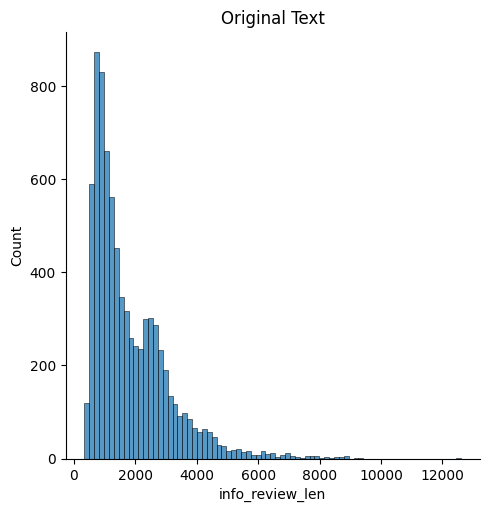

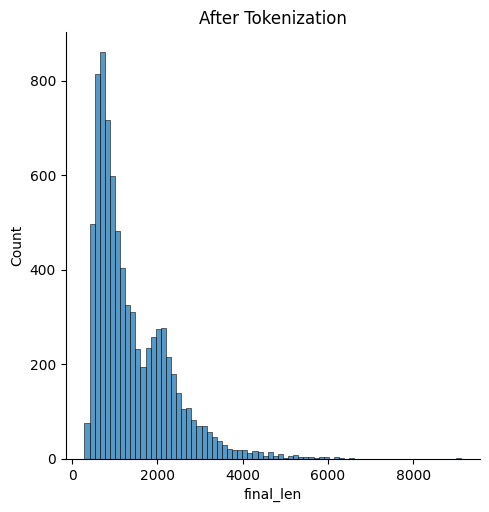

In [44]:
import seaborn as sns
sns.displot(df['info_review_len'],kde=False).set(title='Original Text')
sns.displot(df['final_len'],kde=False).set(title='After Tokenization')


In [45]:
#indices are out of order due to dropping off some rows
print(df.shape)
df.tail(3)

(7875, 16)


,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_stopwords,final,final_len
9997,Defiance Lawkeeper Metal Badge Prop Replica,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,B00K0M35B4,[],5.0,496947,arrived in excellent condition,Technical Details Item Weight159 g Product Dim...,54.99,670,"[technical, details, item, weight159, g, produ...",technical details item weight159 g product dim...,587
9998,Justice League of America Series 3 Green Lante...,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,B001AZV832,[],5.0,1304952,"Okay, Hal Jordan figures come and go. There is...",Technical Details Item Weight181 g Product Dim...,62.26,2280,"[technical, details, item, weight181, g, produ...",technical details item weight181 g product dim...,1695
9999,Star Wars 1/72 Y-Wing Starfighter,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details Item Weight299 g Product Dim...,,B00WW4FDBI,[],4.5,21788,1st class kit top marks to bandai if your not ...,Technical Details Item Weight299 g Product Dim...,26.50,2407,"[technical, details, item, weight299, g, produ...",technical details item weight299 g product dim...,1609


In [46]:
##Set the indices from 0 to 7874
df = df.set_index(pd.Index(range(df.shape[0])))
df.tail(3)

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_stopwords,final,final_len
7872,Defiance Lawkeeper Metal Badge Prop Replica,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,B00K0M35B4,[],5.0,496947,arrived in excellent condition,Technical Details Item Weight159 g Product Dim...,54.99,670,"[technical, details, item, weight159, g, produ...",technical details item weight159 g product dim...,587
7873,Justice League of America Series 3 Green Lante...,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,B001AZV832,[],5.0,1304952,"Okay, Hal Jordan figures come and go. There is...",Technical Details Item Weight181 g Product Dim...,62.26,2280,"[technical, details, item, weight181, g, produ...",technical details item weight181 g product dim...,1695
7874,Star Wars 1/72 Y-Wing Starfighter,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details Item Weight299 g Product Dim...,,B00WW4FDBI,[],4.5,21788,1st class kit top marks to bandai if your not ...,Technical Details Item Weight299 g Product Dim...,26.50,2407,"[technical, details, item, weight299, g, produ...",technical details item weight299 g product dim...,1609


### Create TF-IDF Vectors: 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [48]:
vector = TfidfVectorizer(max_df=0.3,         # drop words that occur in more than X percent of documents
                             #min_df=8,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )

In [49]:
text = df['final']
tfidf = vector.fit_transform(text)
tfidf = tfidf.toarray()

vocab = vector.get_feature_names_out()
tfidf_df = pd.DataFrame(np.round(tfidf, 2), columns=vocab)

In [50]:
print(tfidf_df.shape)
tfidf_df.head()

(7875, 57603)


,00,000,0000,0000000,00000109,00004,0001,000_a,000th,001,...,òblockheadó,òlet,öffnenden,œ360,どうもありがとうございます,ドラゴンボールz,ﬁght,ﬁgure,ﬁgures,ﬁnd
0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
print(vocab[12500:12550])

['asinb0090ifm8i' 'asinb0090l9sai' 'asinb0090uyt80' 'asinb009117p52'
 'asinb00912dy8s' 'asinb00912rxb2' 'asinb009151rgg' 'asinb0091523f0'
 'asinb00915lrhu' 'asinb0091cjn4m' 'asinb0091ez2ky' 'asinb0091ezc7w'
 'asinb0091ngt0m' 'asinb0091oyh4g' 'asinb0091ozg4q' 'asinb0091pfkyq'
 'asinb0091sy8im' 'asinb00921rhj0' 'asinb00926roxy' 'asinb00927slus'
 'asinb0092irgv2' 'asinb0092jzdes' 'asinb00931066u' 'asinb009310wd2'
 'asinb009311m6i' 'asinb009311xzi' 'asinb009313opk' 'asinb0093a94ve'
 'asinb0093hpk3i' 'asinb0093lgocu' 'asinb0093lipp4' 'asinb0093lktvc'
 'asinb0093lqztm' 'asinb0093lvw2w' 'asinb0093lwpd2' 'asinb0093lx8i8'
 'asinb0093m5pym' 'asinb0093m7l6w' 'asinb0093m9zwa' 'asinb0093me10q'
 'asinb0093mlwsu' 'asinb0093mom3w' 'asinb0094h82x2' 'asinb0094j1pj8'
 'asinb0094ptf26' 'asinb0094q0ua6' 'asinb0095kk4vg' 'asinb0095kkpbu'
 'asinb0095vanv6' 'asinb0095wh26o']


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
#Find the similarity between texts (reviews +product descriptions) of products
cosine_compare = cosine_similarity(tfidf, tfidf)

In [54]:
cosine_compare.shape

(7875, 7875)

In [55]:
last = cosine_compare[0]

In [56]:
# Take an array return highest 10 numbers' indices except the highest which is the product itself (1):
def highest_ten(array):
    top10 = sorted(array, reverse=True)[1:11]
    indices = [np.where(np.isin(array, i))[0] for i in top10]
    return indices
highest_ten(last)

[array([104]),
 array([112]),
 array([8]),
 array([51]),
 array([161]),
 array([4325]),
 array([35]),
 array([76]),
 array([50]),
 array([4372])]

In [57]:
#For each row of cosine_compare array, find the most similar ten others:
most_similar = {}
for i in range(cosine_compare.shape[0]):
    most_similar[i] = list()
    most_similar[i].append(highest_ten(cosine_compare[i]))
    
most_similar[0]

[[array([104]),
  array([112]),
  array([8]),
  array([51]),
  array([161]),
  array([4325]),
  array([35]),
  array([76]),
  array([50]),
  array([4372])]]

In [58]:
len(most_similar.keys())

7875

In [59]:
df[df.index ==list(most_similar[0][0][0])[0]]

,product_name,average_review_rating,amazon_category_and_sub_category,product_information,product_description,asin,related_products_asin,rating,product_ranking,reviews,product_info,price_US,info_review_len,no_stopwords,final,final_len
104,Power Trains Motorized Train Set Freight Milit...,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Technical Details Item Weight100 g Product Dim...,Product Description Motorized Train Engine tha...,B007T4KNG6,"[B007T4KQ40, B007T4KP7I, B007T4KNFM, B007T4KP7...",5.0,193638,"easy to couple with other models, great to exp...",Technical Details Item Weight100 g Product Dim...,27.44,1222,"[technical, details, item, weight100, g, produ...",technical details item weight100 g product dim...,1022


For each product, we found the ten most similar products based on the product review, product description and information. To improve this recommendation system even further, we can take a few more steps. As mentioned before, adding related products to the most similar products could improve the performance. After adding them to the most similar products group,

- recommend products that are within a similar price range to the current product
- recommend products that have higher ratings
- recommend products that have higher ranking in the best seller list

In [60]:
#The following code forms a list that includes indices of the current product, ten most similar products and 
# related products if any.
text_measure = {} 
for j in range(len(most_similar)):
    similar_idx = []
    similar_idx.append(j) #product itself
    for i in range(10):
        similar_idx.append(list(most_similar[j][0][i])[0]) # top 10 most similar products 
    for m in df.loc[j, 'related_products_asin']: #if there are any related products add them to the list as well
        if m in df.asin.values:
            if df[df['asin']==m].index[0] not in similar_idx:
                similar_idx.append(df[df['asin']==m].index[0])
    text_measure[j]={'text_based':df.loc[similar_idx,['product_ranking', 'rating', 'price_US']]}            
    

In [61]:
text_df = pd.DataFrame(text_measure)
text_df.loc['text_based',2] #Product #2 and most similar products based on text and related products

,product_ranking,rating,price_US
2,54147,3.9,12.49
139,6502,4.2,136.24
4342,197857,4.2,21.24
35,56416,4.6,99.94
5982,7077,4.4,9.81
6068,46261,4.8,9.36
1513,40997,4.3,67.42
112,25355,4.4,79.99
6009,6413,4.3,31.24
6045,56955,5.0,36.14


In [62]:
# Text similarity based most similar and related products:
text_based_similarity = {}
for i in range(text_df.shape[1]):
    text_based_similarity[i] = text_df.loc['text_based',i].index[1:]
text_based_similarity[2]

Int64Index([139, 4342, 35, 5982, 6068, 1513, 112, 6009, 6045, 7], dtype='int64')

In [65]:
#The following code finds the difference between the price of the current product and all other similar products' prices 
# and chooses the top five products with the smallest differences:  
price_difference = {}
for j in range(text_df.shape[1]):
    price_diff = []
    for i in range(len(text_df.loc['text_based',i][1:])):
        price_diff.append((text_df.loc['text_based',j].index[i+1], round(abs(text_df.loc['text_based',j].iloc[0,2]-text_df.loc['text_based',j].iloc[i+1,2]),2)))
    #Sort the price list by the price in ascending order
    def sort_list(items): 
        # Sorts in Ascending order 
        items.sort(key = lambda x: x[1]) 
        return items
    top5_min_diff = sort_list(price_diff)[:5]
    #get only the indices:
    indices = [ind[0] for ind in top5_min_diff]
    price_difference[j] = indices
price_difference[2]

[5982, 6068, 4342, 6009, 6045]

In [66]:
#Five products with the highest ranking
ranking = {}
for  i in range(text_df.shape[1]):
    ranking[i] = text_df.loc['text_based',i][1:].sort_values('product_ranking', ascending=True).index[:5]
ranking[2]

Int64Index([6009, 139, 5982, 112, 1513], dtype='int64')

In [67]:
# Five products with the highest rating
rating = {}
for  i in range(text_df.shape[1]):
    rating[i] = text_df.loc['text_based',i][1:].sort_values('rating', ascending=False).index[:5]
rating[2]

Int64Index([6045, 6068, 35, 5982, 112], dtype='int64')

In [68]:
#Add all four measures
all_df = pd.DataFrame.from_records([text_based_similarity, price_difference, ranking, rating]).T
all_df.columns = ['Text Based', 'Price Based', 'Better Ranking', 'Better Rating']

In [69]:
all_df.head(3)

,Text Based,Price Based,Better Ranking,Better Rating
0,"Int64Index([104, 112, 8, 51, 161, 4325, 35, 76...","[161, 4325, 51, 4372, 104]","Int64Index([112, 50, 4325, 35, 8], dtype='int64')","Int64Index([104, 8, 76, 161, 51], dtype='int64')"
1,"Int64Index([4342, 4386, 11, 4382, 4369, 121, 1...","[4342, 119, 4386, 11, 4382]","Int64Index([25, 14, 4342, 4386, 4382], dtype='...","Int64Index([4386, 11, 4382, 4369, 121], dtype=..."
2,"Int64Index([139, 4342, 35, 5982, 6068, 1513, 1...","[5982, 6068, 4342, 6009, 6045]","Int64Index([6009, 139, 5982, 112, 1513], dtype...","Int64Index([6045, 6068, 35, 5982, 112], dtype=..."


In [70]:
#The following function, given a product index and a text, prints out the product itself in the first row and the
# appropriate similar products' rows:
#If the text is 'Most Similar', it prints out the most similar products based on product descriptions + reviews and related products. 
#Then these products can be filtered by Price, Ranking and Rating:
# If the text is 'Filter by Price', it prints out 5 products whose price is the closest to the entered product, sorted
# by the difference in ascending order
#If the text is 'Filter by Ranking', it prints out 5 products whose rankings are the highest among the "most similar" product group in 
#ascending order (higher number means lower ranking)
#If the text is 'Filter by Rating', it prints out 5 products whose ratings are the highest among the "most similar" product group in
#descending order.
def choose_similar(prod_id, text):
    cols=['product_name','amazon_category_and_sub_category','product_description', 'asin','reviews', 'product_ranking', 'price_US','rating', ]
    if text == 'Most Similar':
        return pd.concat([pd.DataFrame(df.loc[prod_id,cols]).T, df.loc[all_df.loc[prod_id, 'Text Based'],cols]])
    elif text == 'Filter by Price':
        return pd.concat([pd.DataFrame(df.loc[prod_id,cols]).T, df.loc[all_df.loc[prod_id,'Price Based'],cols]])
    elif text == 'Filter by Ranking':
        return pd.concat([pd.DataFrame(df.loc[prod_id,cols]).T, df.loc[all_df.loc[prod_id,'Better Ranking'],cols]])
    elif text =='Filter by Rating':
        return pd.concat([pd.DataFrame(df.loc[prod_id,cols]).T, df.loc[all_df.loc[prod_id, 'Better Rating'],cols]])
    else:
        return "Enter a valid answer."
#Product with index=2000 
choose_similar(2000, "Most Similar") # First row belongs to the current product

,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
2000,My 1st JCB Party - Joey JCB Party Inflate-A-Fu...,Party Supplies > Decorations > Balloons,,B00IL7M0WA,Great little balloons my little boy loved the ...,43290,1.88,4.0
2056,"12"" Glitz Black and Silver Latex 60th Birthday...",Party Supplies > Decorations > Balloons,Colour Name:Black/Silver Product Description G...,B0048DMW2O,"Good quality balloons, blown up to a decent si...",20082,1.84,4.5
2151,BLACK ELEGANT HAPPY BIRTHDAY BALLOONS x10,Party Supplies > Decorations > Balloons,Black pack of 10 birthday balloons. Perfect fo...,B016DGBKZ8,"lovely balloons, look really expensive arrived...",330298,2.25,5.0
2026,"Age 100/100th Birthday Tropical Assorted 11"" Q...",Party Supplies > Decorations > Balloons,Made by Qualatex - The Choice of Professionals...,B007C85PSK,I loved the quality of these balloons but when...,19634,2.59,4.4
2219,Pack of 8 'Birthday Girl' Latex Party Balloons...,Party Supplies > Decorations > Balloons,Pack of 8 'Birthday Girl' Latex Party Balloons...,B00C7PXDIW,These we ok as far as balloons go. A couple po...,131570,2.0,4.0
2171,"Balloon 10"" Midnight Blk for Party Decoration",Party Supplies > Decorations > Balloons,Black latex balloons for Halloween parties. Or...,B000WNH652,Bargin for the price and looked fantastic with...,126860,6.08,4.3
2052,Ginger Ray Happy Birthday Sea Ocean Themed Par...,Party Supplies > Decorations > Balloons,Our colourful pack of balloons are a great way...,B00S8CNX9C,Great product. We bought a few items from thes...,109515,3.74,5.0
2240,"PEPPA PIG 11"" Story Latex Balloons Pink & Blue...",Party Supplies > Decorations > Balloons,Package Quantity:6 | Style Name:Original Pac...,B00LCIKE8C,These are the best balloons I've ever bought. ...,909,2.45,4.8
2093,"Pack of 20 Red/White/Blue Latex Balloons (9""/2...",Party Supplies > Decorations > Balloons,Product Description As one of Amscan Internati...,B004TU6E20,They are cheap and do the job but if you are e...,3778,2.36,4.3
2207,"12"" Latex Pirate Party Birthday Balloons, Pack...",Party Supplies > Decorations > Balloons,Package Quantity:1 | Style Name:Original Pac...,B007HLZ85W,"Fabulous balloons, great ""pirate"" colours, red...",40745,2.74,4.7


In [71]:
choose_similar(2000, "Filter by Price") # First row belongs to the current product

,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
2000,My 1st JCB Party - Joey JCB Party Inflate-A-Fu...,Party Supplies > Decorations > Balloons,,B00IL7M0WA,Great little balloons my little boy loved the ...,43290,1.88,4.0
2056,"12"" Glitz Black and Silver Latex 60th Birthday...",Party Supplies > Decorations > Balloons,Colour Name:Black/Silver Product Description G...,B0048DMW2O,"Good quality balloons, blown up to a decent si...",20082,1.84,4.5
2219,Pack of 8 'Birthday Girl' Latex Party Balloons...,Party Supplies > Decorations > Balloons,Pack of 8 'Birthday Girl' Latex Party Balloons...,B00C7PXDIW,These we ok as far as balloons go. A couple po...,131570,2.0,4.0
2151,BLACK ELEGANT HAPPY BIRTHDAY BALLOONS x10,Party Supplies > Decorations > Balloons,Black pack of 10 birthday balloons. Perfect fo...,B016DGBKZ8,"lovely balloons, look really expensive arrived...",330298,2.25,5.0
2093,"Pack of 20 Red/White/Blue Latex Balloons (9""/2...",Party Supplies > Decorations > Balloons,Product Description As one of Amscan Internati...,B004TU6E20,They are cheap and do the job but if you are e...,3778,2.36,4.3
2240,"PEPPA PIG 11"" Story Latex Balloons Pink & Blue...",Party Supplies > Decorations > Balloons,Package Quantity:6 | Style Name:Original Pac...,B00LCIKE8C,These are the best balloons I've ever bought. ...,909,2.45,4.8


In [72]:
choose_similar(2000, "Filter by Ranking") #First row belongs to the current product

,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
2000,My 1st JCB Party - Joey JCB Party Inflate-A-Fu...,Party Supplies > Decorations > Balloons,,B00IL7M0WA,Great little balloons my little boy loved the ...,43290,1.88,4.0
2240,"PEPPA PIG 11"" Story Latex Balloons Pink & Blue...",Party Supplies > Decorations > Balloons,Package Quantity:6 | Style Name:Original Pac...,B00LCIKE8C,These are the best balloons I've ever bought. ...,909,2.45,4.8
2093,"Pack of 20 Red/White/Blue Latex Balloons (9""/2...",Party Supplies > Decorations > Balloons,Product Description As one of Amscan Internati...,B004TU6E20,They are cheap and do the job but if you are e...,3778,2.36,4.3
2026,"Age 100/100th Birthday Tropical Assorted 11"" Q...",Party Supplies > Decorations > Balloons,Made by Qualatex - The Choice of Professionals...,B007C85PSK,I loved the quality of these balloons but when...,19634,2.59,4.4
2056,"12"" Glitz Black and Silver Latex 60th Birthday...",Party Supplies > Decorations > Balloons,Colour Name:Black/Silver Product Description G...,B0048DMW2O,"Good quality balloons, blown up to a decent si...",20082,1.84,4.5
2207,"12"" Latex Pirate Party Birthday Balloons, Pack...",Party Supplies > Decorations > Balloons,Package Quantity:1 | Style Name:Original Pac...,B007HLZ85W,"Fabulous balloons, great ""pirate"" colours, red...",40745,2.74,4.7


In [73]:
choose_similar(2000, "Filter by Rating") # First row belongs to the current product

,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
2000,My 1st JCB Party - Joey JCB Party Inflate-A-Fu...,Party Supplies > Decorations > Balloons,,B00IL7M0WA,Great little balloons my little boy loved the ...,43290,1.88,4.0
2151,BLACK ELEGANT HAPPY BIRTHDAY BALLOONS x10,Party Supplies > Decorations > Balloons,Black pack of 10 birthday balloons. Perfect fo...,B016DGBKZ8,"lovely balloons, look really expensive arrived...",330298,2.25,5.0
2052,Ginger Ray Happy Birthday Sea Ocean Themed Par...,Party Supplies > Decorations > Balloons,Our colourful pack of balloons are a great way...,B00S8CNX9C,Great product. We bought a few items from thes...,109515,3.74,5.0
2082,"Red Tractor 26"" Foil Balloon - Farmyard Party",Party Supplies > Decorations > Balloons,,B00K2VK08Y,Excellent value although it cost twice as much...,58995,4.25,5.0
2240,"PEPPA PIG 11"" Story Latex Balloons Pink & Blue...",Party Supplies > Decorations > Balloons,Package Quantity:6 | Style Name:Original Pac...,B00LCIKE8C,These are the best balloons I've ever bought. ...,909,2.45,4.8
2207,"12"" Latex Pirate Party Birthday Balloons, Pack...",Party Supplies > Decorations > Balloons,Package Quantity:1 | Style Name:Original Pac...,B007HLZ85W,"Fabulous balloons, great ""pirate"" colours, red...",40745,2.74,4.7


### Finding the Most Similar Products using Word Embeddings:
While the system above is effective for a specific product, users usually do not enter a product name or number into the system. Instead, if they're searching for party supplies, they might simply input the keyword 'party,' and the Amazon website would display products relevant to party planning. Consequently, I have devised a different approach utilizing word embeddings. The following model identifies related words for a given input word using word2vec and then searches for products with descriptions or reviews that include these words. 

In [74]:
import gensim

model = gensim.models.Word2Vec(df["no_stopwords"], # list of lists of tokens 
                              sg = 0, #either default CBOW(0) or skip gram(1)  
                              min_count=10, #word occurs at least 10 times
                              workers=4, # number of CPU Threads to use at once for faster training
                              vector_size=50, #number of Neurons to incorporate in hidden layer or size of Word Embeddings. By default its set to 100.
                              window=5, # window Size or Number of words to consider around target. If size = 1 then 1 word from both sides will be considered. By default 5 is fixed Window Size.
                              epochs = 10 ) #iter : Number of Iterations / Epochs.
len(model.wv)

7751

In [75]:
word_vectors = model.wv

In [76]:
import pprint
similar_words = {search_term: [item[0] for item in word_vectors.most_similar([search_term], topn=5)]
                  for search_term in ["balloons", "flowers","train","toy","rail"]}
pprint.pprint(similar_words)

{'balloons': ['banners', 'invitations', 'stickers', 'banner', 'decorations'],
 'flowers': ['background', 'eye-catching', 'embroidered', 'shaped', 'lace'],
 'rail': ['vehicles', 'locomotives', 'trains', 'railway', 'sets'],
 'toy': ['success', 'trumpet', 'dinosaur', 'investment', 'indeed'],
 'train': ['engines', 'brio', 'tracks', 'mexican', 'circuit']}


In [89]:
all_text = df['final'].values
#This function, given a word, finds out in which rows of the dataframe the word occured.
# It also finds the most similar five words and saves their occurances as well (as indices)  
def  word_idx_dict(word):
  if word in  word_vectors.index_to_key[0:7752]:
    word_indices = {}
    def index_similar(word):
        word_idx = [i for i in range(len(all_text)) if word in all_text[i]]
        return word_idx

    word_indices[word] = index_similar(word)
    similar_words = [item[0] for item in word_vectors.most_similar([word],topn=5)]
    
    for i in similar_words:
      word_indices[i] = index_similar(i)
  
    return word_indices
  else:
    return 'Word is not in the data set.'

word_idx_dict('favor')

'Word is not in the data set.'

In [79]:
print(word_idx_dict('airplane').keys())

dict_keys(['airplane', 'heli', 'output', 'li-po', 'drift', 'cylinder'])


In [80]:
word_idx_dict('airplane').items()

dict_items([('airplane', [1056, 1619, 1663, 1711, 1717, 1719, 1721, 1726, 1790, 5509, 5630, 5818, 6017, 7107]), ('heli', [1018, 1477, 1603, 1606, 1607, 1609, 1611, 1612, 1616, 1620, 1622, 1630, 1631, 1636, 1638, 1640, 1646, 1663, 1680, 1699, 1701, 1711, 1715, 1719, 1721, 1724, 1726, 1729, 1740, 1751, 1954, 1955, 1956, 1958, 1959, 1960, 1969, 1974, 1978, 1984, 1989, 1993, 1994, 1995, 1996, 2002, 2003, 2007, 2010, 2013, 2016, 2020, 2021, 2023, 2026, 2029, 2030, 2032, 2037, 2040, 2045, 2046, 2051, 2056, 2059, 2062, 2072, 2074, 2079, 2086, 2087, 2088, 2089, 2095, 2097, 2102, 2104, 2105, 2109, 2110, 2116, 2144, 2145, 2148, 2154, 2157, 2162, 2163, 2164, 2167, 2168, 2169, 2174, 2175, 2176, 2178, 2180, 2185, 2186, 2190, 2191, 2193, 2195, 2197, 2199, 2202, 2203, 2204, 2206, 2207, 2208, 2210, 2211, 2215, 2218, 2219, 2221, 2222, 2227, 2228, 2233, 2234, 2235, 2237, 2242, 2243, 2244, 2247, 2250, 2259, 2260, 2261, 2265, 2266, 2269, 2270, 2271, 2276, 2277, 2278, 2279, 2283, 2284, 2286, 2559, 2586, 27

In [85]:
#The following code, given a word, searches the related top 5 products with the highest ranking.
#It also finds the most similar words to the given word and for each of them searches the related
# top 5 products with the highest ranking. It then displays them based on the products' ratings.  
# If the word is not in vocabulary it doesn't do anthing.
from IPython.display import display

def reccom_similar(word):
  cols=['product_name','amazon_category_and_sub_category','product_description', 'asin','reviews', 'product_ranking', 'price_US','rating', ]
  if type(word_idx_dict(word)) != str:  # if word is in vocabulary
    word_occurance = {}
    for i in word_idx_dict(word).keys():
      word_occurance[i] = df.loc[word_idx_dict(word)[i],cols].sort_values('product_ranking', ascending=True)[:5]
    return word_occurance
  else:
    return dict()
def print_items(word):
  word_occ = reccom_similar(word)
  print("The entered word and the most similar words are ")
  print(word_occ.keys())
        
  for k, v in word_occ.items():
        item_df = pd.DataFrame(word_occ[k])
        item_df['Word'] = k
        temp_cols=item_df.columns.tolist()
        new_cols=temp_cols[-1:] + temp_cols[:-1]
        item_df=item_df[new_cols]
        item_df.sort_values('rating', inplace=True, ascending=False)
        display(item_df)
print_items('princess')

The entered word and the most similar words are 
dict_keys(['princess', 'barbie', 'princesses', 'minnie', 'mouse', 'disney'])


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
6414,princess,Ben and Holly Thistle Castle Playset,Figures & Playsets > Accessories,Product Description Introduction to Ben & Holl...,B00LA2R0Q4,"Bought for my youngest grand-daughter, who is ...",1396,31.24,4.7
3932,princess,Love Letter Card Game,Games > Card Games,Product Description Reach the princess All of ...,B00AGJ4HC2,How 16 cards can make such a fun game is almos...,1178,9.62,4.6
1010,princess,Unicorn Party Game for 16,Arts & Crafts > Paper & Stickers,Product Description Time for fun and games at ...,B00BCMVDLU,This saved me drawing a dodgy looking donkey! ...,1941,1.86,4.5
3841,princess,Disney Princess Sparkle Party Swirl Hanging De...,Characters & Brands > Disney > Toys,,B00BY00FGE,These I was a little dissatisfied with - They ...,1968,4.21,4.4
2887,princess,Eye Masks Foil - Assorted Colours - Pack of 8,Fancy Dress > Accessories > Masks,Eye Masks Pack of 8 Assorted Colour Material: ...,B006TWULJI,Fantastic value for money & quick delivery! Bo...,1846,1.61,4.3


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
7499,barbie,Barbie Collector Fashion Model Bride Dress,Dolls & Accessories > Fashion Dolls & Accessor...,"Product Description Inspired by the rich, evoc...",B00GRMJKLA,Perfect,53064,81.24,5.0
1079,barbie,Alligator Books Barbie Sticker Scene,Characters & Brands > Barbie,Product Description Have hours of fun with the...,0857261363,my little girl loves anything to do with Barbi...,78815,2.99,5.0
4627,barbie,Toy Story Woodys Horse Bullseye,Characters & Brands > Disney > Toys,Gallop into the sunset with Woodys trusty stee...,B0033PRQVA,"I grew up with the Toy Story franchise, so whe...",26081,50.00,4.7
376,barbie,Barbie Advent Calendar,Characters & Brands > Barbie,Product Description Celebrate the holidays in ...,B00TXI26S4,My daughter loves it . Just to expensive chang...,66487,16.51,4.5
6134,barbie,Barbie Dream House Playset,Dolls & Accessories > Fashion Dolls & Accessor...,Product Description Move right into the Barbie...,B00T03U6AC,My 4 1/2 year old was beside herself with exci...,54543,268.74,4.2


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
1010,princesses,Unicorn Party Game for 16,Arts & Crafts > Paper & Stickers,Product Description Time for fun and games at ...,B00BCMVDLU,This saved me drawing a dodgy looking donkey! ...,1941,1.86,4.5
3841,princesses,Disney Princess Sparkle Party Swirl Hanging De...,Characters & Brands > Disney > Toys,,B00BY00FGE,These I was a little dissatisfied with - They ...,1968,4.21,4.4
6482,princesses,Casdon 519 Toy Pick & Mix Sweet Shop,Pretend Play > Shops & Accessories,Product Description Pick & Mix sweet shop supp...,B000296LKM,I find it quite humbling that this Christmas t...,2508,9.09,4.4
2887,princesses,Eye Masks Foil - Assorted Colours - Pack of 8,Fancy Dress > Accessories > Masks,Eye Masks Pack of 8 Assorted Colour Material: ...,B006TWULJI,Fantastic value for money & quick delivery! Bo...,1846,1.61,4.3
2162,princesses,Plain Black 12 Inches Helium Quality Latex Bal...,Party Supplies > Decorations > Balloons,Style Name:Black/50 Pack Plain Black 12 Inches...,B004JUQ40W,I ordered these balloons for my son's birthday...,1975,2.69,4.3


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
4775,minnie,2.2m Bowtique Disney Minnie Mouse Happy Birthd...,Characters & Brands > Disney > Toys,Product Description This adorable Minnie Mouse...,B00DM6EJ5G,Good price looks great Perfect,29716,3.74,5.0
723,minnie,Star Cutouts Cut Out of Minnie Mouse,Figures & Playsets > Science Fiction & Fantasy,Product Description The Cardboard Cut out of M...,B0076685OO,Fab Minnie cutout. Used on my daughters birthd...,34729,14.99,4.8
1229,minnie,Disney Minnie Mouse Swimming Armbands 3-6 Years,Characters & Brands > Disney > Toys,Disney Minnie Mouse swimming arm bands,B003OWHUHW,Excellent product. Daughter wore them all day ...,47718,3.74,4.6
1212,minnie,Mickey Mouse Clubhouse: Minnie and Daisy Armbands,Characters & Brands > Disney > Toys,Bestway inflatable armbands in Minnie Mouse & ...,B004VL390W,my daughter loves these and they hold her up w...,37007,6.86,4.5
2063,minnie,Onyx Black 260q Qualatex Modelling Balloons x 20,Party Supplies > Decorations > Balloons,,B006S6Q7V6,I did not think that they will arrive not bagg...,57735,2.17,4.4


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
7303,mouse,Ravensburger The Gruffalo Mini Memory,Characters & Brands > Ravensburger,Product Description A set of 48 bright and col...,B00HFR4FAW,My little boy is17 months old absolutely adore...,613,4.99,4.9
3721,mouse,Amscan Playful Mickey Pennant Banner Party Acc...,Characters & Brands > Disney > Toys,Product Description As one of Amscan Internati...,B00BHV7IZ6,"prompt delivery,thank you very much and item a...",5716,4.53,4.9
6488,mouse,10pcs Velvet Animal Style Finger Puppets Set,Puppets & Puppet Theatres > Finger Puppets,"Perfect for family entertainment, school, day ...",B008TGTWNS,At only £2 these finger puppets were a great b...,1938,2.49,4.5
2918,mouse,8 Assorted Foam Animal Masks,Fancy Dress > Accessories > Masks,These are great for children's dressing up par...,B00288CSI4,I ordered two sets for my daughter's birthday ...,2174,2.38,4.4
1214,mouse,Mickey Mouse Inflatable Character 52cm,Sports Toys & Outdoor > Beach Toys > Paddling ...,Inflatable Mickey Character Height : 52 cm,B00160VXUE,I bought this for my little ones first birthda...,4589,2.97,3.9


,Word,product_name,amazon_category_and_sub_category,product_description,asin,reviews,product_ranking,price_US,rating
7144,disney,Funko Television The Flash Pop Vinyl Figure,Figures & Playsets > Science Fiction & Fantasy,Funko is a pop culture licensed-focused toy co...,B00TP016G8,What can i sayLooks awesome! Kept in box so as...,1042,12.44,4.8
1784,disney,LEGO Star Wars 75103: First Order Transporter,Characters & Brands > Disney > Toys,"Product Description Lower the ramp, load the t...",B00SDTTIQC,Like many fans I couldn't wait to see what the...,729,74.99,4.7
4059,disney,Frozen Top Trumps Card Game,Characters & Brands > Disney > Toys,Style Name:Frozen Top Trumps Product Descripti...,B00NAV0BZK,This is a lovely set of top trumps cards which...,1212,3.38,4.7
3841,disney,Disney Princess Sparkle Party Swirl Hanging De...,Characters & Brands > Disney > Toys,,B00BY00FGE,These I was a little dissatisfied with - They ...,1968,4.21,4.4
6187,disney,Disney Toy Story 16-inch Talking Woody Pull St...,Characters & Brands > Disney > Toys,This cheerful cowboy is sure to bring huge smi...,B001RVUA44,My 4 year old son is very pleased with his bir...,1979,46.25,4.4


In [86]:
print_items('lipstick') #lipstick is not in vocabulary, so no output

The entered word and the most similar words are 
dict_keys([])


Thanks for reading my project!